In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


In [111]:
df = pd.read_csv('household_power_consumption.txt', sep=';',parse_dates={'dt':['Date','Time']},
                infer_datetime_format=True,
                low_memory=False,
                index_col='dt')

In [112]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [113]:
df.isnull().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   global_active_power    object 
 1   global_reactive_power  object 
 2   voltage                object 
 3   global_intensity       object 
 4   sub_metering_1         object 
 5   sub_metering_2         object 
 6   sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 126.7+ MB


In [115]:
df.describe(include='all')

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259,2075259,2075259,2075259,2075259,2075259,2.049280e+06
unique,4187,533,2838,222,89,82,NaN
top,?,0.000,?,1.000,0.000,0.000,NaN
freq,25979,481561,25979,172785,1880175,1436830,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,6.458447e+00
std,NaN,NaN,NaN,NaN,NaN,NaN,8.437154e+00
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.700000e+01


In [116]:
df.columns = df.columns.str.lower()

In [117]:
df.columns

Index(['global_active_power', 'global_reactive_power', 'voltage',
       'global_intensity', 'sub_metering_1', 'sub_metering_2',
       'sub_metering_3'],
      dtype='object')

In [123]:
# df = df.fillna()
df = df.replace('?', 'Nan')

In [93]:
df.describe(include='all')

,global_active_power,global_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3
count,2075259.0,2075259,2075259.0,2075259,2075259,2075259,2.049280e+06
unique,4187.0,533,2838.0,222,89,82,NaN
top,0.0,0.000,0.0,1.000,0.000,0.000,NaN
freq,25979.0,481561,25979.0,172785,1880175,1436830,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,6.458447e+00
std,NaN,NaN,NaN,NaN,NaN,NaN,8.437154e+00
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.700000e+01


In [124]:
df = df.astype('float')

In [96]:
df.describe(include='all')

,global_active_power,global_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.049280e+06
mean,1.077950e+00,1.221658e-01,2.378249e+02,4.569827e+00,1.107879e+00,1.282265e+00,6.458447e+00
std,1.057642e+00,1.128556e-01,2.697024e+01,4.446361e+00,6.115669e+00,5.787271e+00,8.437154e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.040000e-01,4.600000e-02,2.388900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.780000e-01,1.000000e-01,2.409600e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.520000e+00,1.920000e-01,2.428600e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [97]:
df.corr()

,global_active_power,global_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3
global_active_power,1.000000,0.257542,0.066527,0.998903,0.483442,0.434426,0.638555
global_reactive_power,0.257542,1.000000,0.107710,0.276466,0.124653,0.141190,0.089617
voltage,0.066527,0.107710,1.000000,0.066114,-0.003139,0.004790,-0.268172
global_intensity,0.998903,0.276466,0.066114,1.000000,0.488270,0.440139,0.626543
sub_metering_1,0.483442,0.124653,-0.003139,0.488270,1.000000,0.055201,0.102571
sub_metering_2,0.434426,0.141190,0.004790,0.440139,0.055201,1.000000,0.080872
sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000


In [98]:
import seaborn as sns

<AxesSubplot:ylabel='dt'>

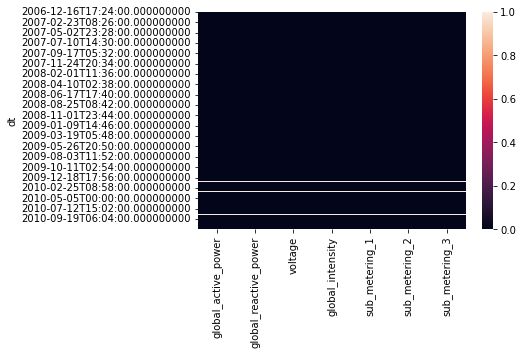

In [125]:
sns.heatmap(df.isnull())

In [126]:
df.isnull().sum()

global_active_power      25979
global_reactive_power    25979
voltage                  25979
global_intensity         25979
sub_metering_1           25979
sub_metering_2           25979
sub_metering_3           25979
dtype: int64

<AxesSubplot:>

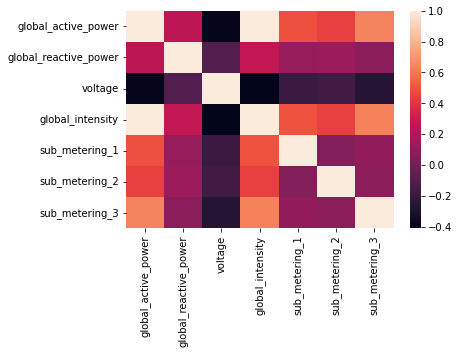

In [127]:
sns.heatmap(df.corr())

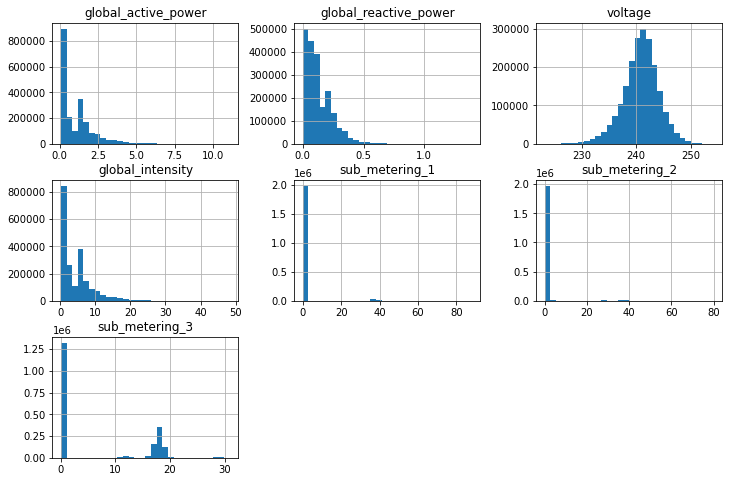

In [133]:
df.hist(bins = 30, figsize=(12,8))
plt.show()

In [131]:
df.dropna(axis=0)

,global_active_power,global_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [132]:
df.corr()

,global_active_power,global_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3
global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555
global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617
voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172
global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543
sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571
sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872
sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000


In [134]:
df.describe()

,global_active_power,global_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01
